In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [65]:
print("My name in Hindi is : \n","\u0932\u094B\u0915\u0947\u0937","\u092c\u0921\u0947\u0932\u093e")

My name in Hindi is : 
 लोकेष बडेला


In [21]:
data = pd.read_csv("nissan.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           400 non-null    int64  
 1   full_name    400 non-null    object 
 2   age          399 non-null    float64
 3   gender       399 non-null    object 
 4   model        396 non-null    object 
 5   color        399 non-null    object 
 6   performance  397 non-null    float64
 7   km           397 non-null    float64
 8   condition    400 non-null    object 
 9   price        400 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 31.4+ KB
None


In [23]:
#1. Gives the shape of the dataframe 
shape = data.shape
print(shape)
print("total number of samples are : ",shape[0])
print("total number of features are : ",shape[1])

(400, 10)
total number of samples are :  400
total number of features are :  10


In [25]:
# 2. Missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values)

total = missing_values.sum()
print("Total number of missing values is : ",total)

id             0
full_name      0
age            1
gender         1
model          4
color          1
performance    3
km             3
condition      0
price          0
dtype: int64
Total number of missing values is :  13


In [27]:
# 3. Data type of each column
data_types = data.dtypes
print(data_types)

id               int64
full_name       object
age            float64
gender          object
model           object
color           object
performance    float64
km             float64
condition       object
price          float64
dtype: object


In [29]:
# 4. Finding out zeros
zeros = (data == 0).sum()
print(zeros)

tot = zeros.sum()
print("Total number of zeros are : ",tot)

id             0
full_name      0
age            0
gender         0
model          0
color          0
performance    0
km             0
condition      0
price          0
dtype: int64
Total number of zeros are :  0


In [31]:
# 5. Mean age
mean_age = data['age'].mean()
print(mean_age)

38.56390977443609


In [33]:
df2 = data.select_dtypes(include=['number'])
print(df2.shape)
f=df2.shape
print("number of samples:",f[0])
print("number of features:",f[1])
print(df2.info())

(400, 5)
number of samples: 400
number of features: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           400 non-null    int64  
 1   age          399 non-null    float64
 2   performance  397 non-null    float64
 3   km           397 non-null    float64
 4   price        400 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 15.8 KB
None


In [35]:
df2.corr()

,id,age,performance,km,price
id,1.000000,-0.025122,0.040426,0.013772,-0.014263
age,-0.025122,1.000000,0.054355,0.000427,0.053576
performance,0.040426,0.054355,1.000000,-0.022019,0.120955
km,0.013772,0.000427,-0.022019,1.000000,-0.144301
price,-0.014263,0.053576,0.120955,-0.144301,1.000000


In [37]:
corr = df2.corr()
np.fill_diagonal(corr.values, np.nan)

max_corr = corr.max().max()
max_corr_ind = np.where(corr == max_corr)
max_corr_pairs = [(corr.index[i] , corr.columns[j]) for i,j in zip(*max_corr_ind)]

print("Maximum correlation value: ",max_corr)
print("Variable pairs with maximum correlation : ",max_corr_pairs)

Maximum correlation value:  0.12095473491218621
Variable pairs with maximum correlation :  [('performance', 'price'), ('price', 'performance')]


In [55]:
first  = max_corr_pairs[0][0]
second = max_corr_pairs[0][1]
print("Graph should be plotted between : ", first , "and" ,  second );

Graph should be plotted between :  performance and price


In [57]:
x = data[first]
y = data[second]

# Splitting the dataset into training and testing sets
train_x , test_x , train_y , test_y = train_test_split(x, y, test_size=0.25, random_state=24)

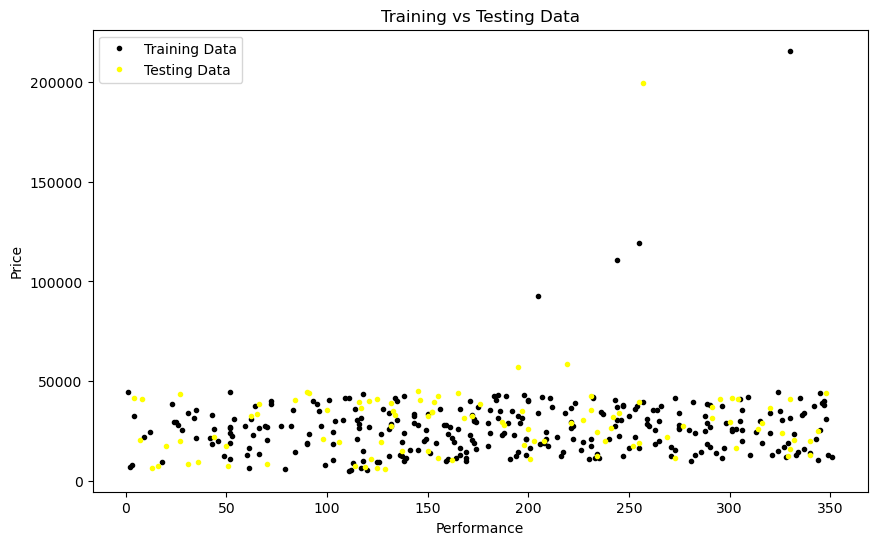

In [67]:
# Plotting training vs testing data
plt.figure(figsize=(10, 6))
plt.plot(train_x, train_y, linestyle = ' ',color='black',marker='o',markersize=3, label='Training Data')
plt.plot(test_x, test_y, linestyle = ' ' ,color='yellow',marker='o',markersize=3, label='Testing Data')
plt.xlabel('Performance')
plt.ylabel('Price')
plt.title('Training vs Testing Data')
plt.legend()
plt.show()
